In [2]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# pylint: disable=unused-import
import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

# pylint: enable=unused-import

# Load MNIST dataset using tf.keras.datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# You can optionally print the shapes to verify
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Importing torch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# For MNIST dataset and visualization
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

In [4]:
# Getting the command-line arguments
# import argparse # No longer needed

# parser = argparse.ArgumentParser()
# parser.add_argument('--epochs', type=int, default=200, help="number of epochs to train")
# parser.add_argument('--batch_size', type=int, default=64, help='size of the batches')
# parser.add_argument('--learning_rate', type=float, default=0.0002, help='adam: learning rate')
# parser.add_argument('--b1', type=float, default=0.5, help='adam: decay rate of first order momentum of gradient')
# parser.add_22argument('--b2', type=float, default=0.999, help='adam: decay rate of second order momentum of gradient')
# parser.add_argument('--latent_dim', type=int, default=100, help='dimensionality of the latent space')
# parser.add_argument('--img_size', type=int, default=28, help='size of each image dimension')
# parser.add_argument('--channels', type=int, default=1, help='number of image channels')
# parser.add_argument('--output_dir', type=str, default='output', help='name of output directory')
# args = parser.parse_args() # No longer needed

# Define variables directly
epochs = 200
batch_size = 64
learning_rate = 0.0002
b1 = 0.5
b2 = 0.999
latent_dim = 100
img_size = 28
channels = 1
output_dir = 'output'


img_shape = (channels, img_size, img_size)

In [5]:
# Check CUDA's presence
cuda_is_present = True if torch.cuda.is_available() else False

class Generator(nn.Module):
        def __init__(self):
                super().__init__()

                def layer_block(input_size, output_size, normalize=True):
                        layers = [nn.Linear(input_size, output_size)]
                        if normalize:
                                layers.append(nn.BatchNorm1d(output_size, 0.8))
                        layers.append(nn.LeakyReLU(0.2, inplace=True))
                        return layers

                self.model = nn.Sequential(
                        *layer_block(latent_dim, 128, normalize=False),
                        *layer_block(128, 256),
                        *layer_block(256, 512),
                        *layer_block(512, 1024),
                        nn.Linear(1024, int(np.prod(img_shape))),
                        nn.Tanh()
                )

        def forward(self, z):
                img = self.model(z)
                img = img.view(img.size(0), *img_shape)
                return img

class Discriminator(nn.Module):
        def __init__(self):
                super().__init__()

                self.model = nn.Sequential(
                        nn.Linear(int(np.prod(img_shape)), 512),
                        nn.LeakyReLU(0.2, inplace=True),
                        nn.Linear(512, 256),
                        nn.LeakyReLU(0.2, inplace=True),
                        nn.Linear(256, 1),
                        nn.Sigmoid()
                )

        def forward(self, img):
                img_flat = img.view(img.size(0), -1)
                verdict = self.model(img_flat)
                return verdict

# Utilize CUDA if available
generator = Generator()
discriminator = Discriminator()
adversarial_loss = torch.nn.BCELoss()

if cuda_is_present:
        generator.cuda()
        discriminator.cuda()
        adversarial_loss.cuda()

# Loading MNIST dataset
os.makedirs('data/mnist', exist_ok=True)
data_loader = torch.utils.data.DataLoader(
        datasets.MNIST('/data/mnist', train=True, download=True,
                transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                        ])),
        batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 126MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 27.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 90.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.52MB/s]


[Epoch    1/200] [Batch    0/938] ---> [D Loss: 0.721022] [G Loss: 0.683447]
[Epoch    1/200] [Batch    1/938] ---> [D Loss: 0.624029] [G Loss: 0.679854]
[Epoch    1/200] [Batch    2/938] ---> [D Loss: 0.554183] [G Loss: 0.676654]
[Epoch    1/200] [Batch    3/938] ---> [D Loss: 0.497773] [G Loss: 0.673396]
[Epoch    1/200] [Batch    4/938] ---> [D Loss: 0.454310] [G Loss: 0.669901]
[Epoch    1/200] [Batch    5/938] ---> [D Loss: 0.426204] [G Loss: 0.665068]
[Epoch    1/200] [Batch    6/938] ---> [D Loss: 0.407641] [G Loss: 0.660021]
[Epoch    1/200] [Batch    7/938] ---> [D Loss: 0.396775] [G Loss: 0.653624]
[Epoch    1/200] [Batch    8/938] ---> [D Loss: 0.392715] [G Loss: 0.645078]
[Epoch    1/200] [Batch    9/938] ---> [D Loss: 0.393400] [G Loss: 0.635835]
[Epoch    1/200] [Batch   10/938] ---> [D Loss: 0.395010] [G Loss: 0.627117]
[Epoch    1/200] [Batch   11/938] ---> [D Loss: 0.401239] [G Loss: 0.614716]
[Epoch    1/200] [Batch   12/938] ---> [D Loss: 0.404044] [G Loss: 0.606709]

/tmp/ipython-input-2381463260.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_for_gif.append(imageio.imread(image_filename))


Streaming output truncated to the last 5000 lines.
[Epoch  195/200] [Batch  628/938] ---> [D Loss: 0.278510] [G Loss: 1.896161]
[Epoch  195/200] [Batch  629/938] ---> [D Loss: 0.246525] [G Loss: 1.835608]
[Epoch  195/200] [Batch  630/938] ---> [D Loss: 0.336794] [G Loss: 2.121274]
[Epoch  195/200] [Batch  631/938] ---> [D Loss: 0.249063] [G Loss: 1.814107]
[Epoch  195/200] [Batch  632/938] ---> [D Loss: 0.288727] [G Loss: 2.046356]
[Epoch  195/200] [Batch  633/938] ---> [D Loss: 0.422125] [G Loss: 2.293159]
[Epoch  195/200] [Batch  634/938] ---> [D Loss: 0.309928] [G Loss: 1.623650]
[Epoch  195/200] [Batch  635/938] ---> [D Loss: 0.277970] [G Loss: 2.122867]
[Epoch  195/200] [Batch  636/938] ---> [D Loss: 0.259351] [G Loss: 2.103179]
[Epoch  195/200] [Batch  637/938] ---> [D Loss: 0.274485] [G Loss: 1.863335]
[Epoch  195/200] [Batch  638/938] ---> [D Loss: 0.396094] [G Loss: 1.621467]
[Epoch  195/200] [Batch  639/938] ---> [D Loss: 0.307970] [G Loss: 1.734849]
[Epoch  195/200] [Batch  

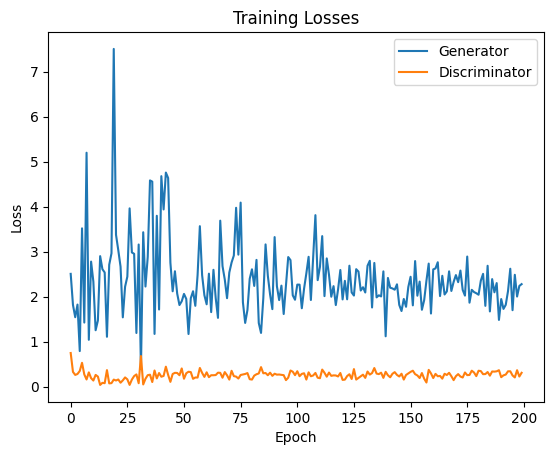

In [6]:
# Training the GAN
os.makedirs(f'{output_dir}/images', exist_ok=True)
Tensor = torch.cuda.FloatTensor if cuda_is_present else torch.FloatTensor

optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate, betas=(b1, b2))
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(b1, b2))

losses = []
images_for_gif = []
for epoch in range(1, epochs+1):
        for i, (images, _) in enumerate(data_loader):

                real_images = Variable(images.type(Tensor))
                real_output = Variable(Tensor(images.size(0), 1).fill_(1.0), requires_grad=False)
                fake_output = Variable(Tensor(images.size(0), 1).fill_(0.0), requires_grad=False)

                # Training Generator
                optimizer_generator.zero_grad()
                z = Variable(Tensor(np.random.normal(0, 1, (images.shape[0], latent_dim))))
                generated_images = generator(z)
                generator_loss = adversarial_loss(discriminator(generated_images), real_output)
                generator_loss.backward()
                optimizer_generator.step()

                # Training Discriminator
                optimizer_discriminator.zero_grad()
                discriminator_loss_real = adversarial_loss(discriminator(real_images), real_output)
                discriminator_loss_fake = adversarial_loss(discriminator(generated_images.detach()), fake_output)
                discriminator_loss = (discriminator_loss_real + discriminator_loss_fake) / 2
                discriminator_loss.backward()
                optimizer_discriminator.step()

                print(f"[Epoch {epoch:=4d}/{epochs}] [Batch {i:=4d}/{len(data_loader)}] ---> "
                        f"[D Loss: {discriminator_loss.item():.6f}] [G Loss: {generator_loss.item():.6f}]")

        losses.append((generator_loss.item(), discriminator_loss.item()))
        image_filename = f'{output_dir}/images/{epoch}.png'
        save_image(generated_images.data[:25], image_filename, nrow=5, normalize=True)
        images_for_gif.append(imageio.imread(image_filename))

# Visualizing the losses at every epoch
losses = np.array(losses)
plt.plot(losses.T[0], label='Generator')
plt.plot(losses.T[1], label='Discriminator')
plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f'{output_dir}/loss_plot.png')

# Creating a gif of generated images at every epoch
imageio.mimwrite(f'{output_dir}/generated_images.gif', images_for_gif, fps=len(images)/5)

In [7]:
# Creating a gif of generated images at every epoch
imageio.mimwrite(f'{output_dir}/generated_images.gif', images_for_gif, fps=len(images)/5)

/tmp/ipython-input-2566166330.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_for_gif = [imageio.imread(f) for f in image_files]


GIF saved to: output/generated_images.gif


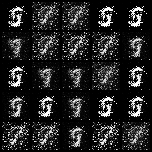

In [8]:
import imageio
import os

# Path to the directory containing the generated images
output_dir = 'output'
images_dir = f'{output_dir}/images'

# List image files and sort them by epoch number
image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.png')]
image_files.sort(key=lambda x: int(os.path.basename(x).split('.')[0]))

# Read the images
images_for_gif = [imageio.imread(f) for f in image_files]

# Create and save the GIF
gif_path = f'{output_dir}/generated_images.gif'
imageio.mimwrite(gif_path, images_for_gif, fps=len(images_for_gif)/5)

print(f"GIF saved to: {gif_path}")

# Display the GIF in the notebook (optional)
from IPython.display import Image, display
display(Image(filename=gif_path))